In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Missing values

In [3]:
df=pd.read_csv('tmdb_5000_movies.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
df2=df.dropna()

In [8]:
df2.isnull().sum().sum()

0

In [9]:
df.shape

(4803, 20)

In [10]:
df2.shape

(1493, 20)

In [11]:
df3 = df.dropna(how='all')
df3.shape

(4803, 20)

In [14]:
df.dropna(thresh=4000, axis=1, inplace=True)

In [15]:
df.isnull().sum().sum()

6

In [1]:
df['overview'].fillna(value='Overview not available', inplace=True)

NameError: name 'df' is not defined

In [19]:
df.loc[df['release_date'].isnull(), 'release_date']

4553    NaN
Name: release_date, dtype: object

In [20]:
df.loc[4552:4555, 'release_date']

4552    2012-03-28
4553           NaN
4554    2015-03-10
4555    2011-10-22
Name: release_date, dtype: object

In [21]:
df['release_date'].fillna(method='ffill')[4552:4555]

4552    2012-03-28
4553    2012-03-28
4554    2015-03-10
Name: release_date, dtype: object

In [22]:
df['release_date'].fillna(method='bfill')[4552:4555]

4552    2012-03-28
4553    2015-03-10
4554    2015-03-10
Name: release_date, dtype: object

In [23]:
df['release_date'].fillna(method='ffill', inplace=True)

In [24]:
df['runtime'].mean()

106.87585919600083

In [25]:
df['runtime'].fillna(value=df['runtime'].mean(), inplace=True)

In [26]:
df.isnull().sum().sum()

0

# Duplicate values

In [28]:
df =  pd.DataFrame({ 'color': ['blue','blue','red','red','blue'], 'value': [2,1,3,3,2]})

In [29]:
df

,color,value
0,blue,2
1,blue,1
2,red,3
3,red,3
4,blue,2


In [30]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [31]:
df.duplicated(keep=False)

0     True
1    False
2     True
3     True
4     True
dtype: bool

In [32]:
df.loc[df.duplicated(),:]

,color,value
3,red,3
4,blue,2


In [33]:
df.drop_duplicates()

,color,value
0,blue,2
1,blue,1
2,red,3


In [34]:
df.drop_duplicates(keep='last')

,color,value
1,blue,1
3,red,3
4,blue,2


In [35]:
df.drop_duplicates(['value'])

,color,value
0,blue,2
1,blue,1
2,red,3


In [36]:
df.drop_duplicates(['color'])

,color,value
0,blue,2
2,red,3


# Outliers

In [38]:
df=pd.DataFrame(np.random.randn(100000,5))
df.head()

,0,1,2,3,4
0,-0.828088,-0.975410,-2.021651,0.515114,-0.370219
1,0.663330,1.235726,-0.756781,1.405154,2.693556
2,0.211668,-0.050214,0.181332,-0.762004,-0.453065
3,-0.247313,0.172904,0.033268,-0.433838,0.494966
4,0.174611,-2.356265,1.215644,1.897476,-0.364567


In [39]:
df.mean()

0   -0.003891
1    0.001583
2    0.006296
3    0.001124
4    0.007526
dtype: float64

In [40]:
df.std()

0    0.999038
1    0.998634
2    1.001301
3    1.001308
4    0.998407
dtype: float64

In [41]:
filter0 = np.abs(df[0] - df[0].mean()) > (3 * df[0].std())
filter0.head()

0    False
1    False
2    False
3    False
4    False
Name: 0, dtype: bool

In [42]:
df.loc[filter0,0]

31       3.142688
164      3.432378
188      3.181864
877     -3.175090
952      3.037317
1993     3.087846
3087     3.933443
3609    -3.114972
4608     3.094645
4702     3.319594
4968    -3.274781
5083    -3.582801
5296     3.440953
5487    -3.539690
5774     3.016426
6213    -3.012683
6341     3.034628
6649     3.491598
6862     3.585598
7731     3.048613
7875    -3.014223
8671    -3.009547
8776     3.195958
9007     3.139164
9643    -3.005673
9794     3.109103
10044    3.703166
10378   -3.160457
10856   -3.308168
10893   -3.050761
           ...   
87937    3.071822
87977   -3.157917
88075   -3.599179
88600    3.247599
88683    3.131452
89358    3.151567
90468    3.622023
90602    3.243458
90802    3.837912
91808    3.059803
91822    3.077145
92313    3.269172
92322    3.024174
93515    3.443779
94077    3.918211
94352    3.444652
94880    3.650706
94884    3.982084
95265    3.891677
96000    3.235879
96089    3.078676
96928   -3.332299
97339   -3.340951
97808    3.004682
97937   -3

In [43]:
filter_all = np.abs(df-df.mean())>(3*df.std())
filter_all.head()

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [44]:
filter_any=filter_all.any(axis=1)
filter_any.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [45]:
outliers = df.loc[filter_any, :]
outliers.shape

(1294, 5)

In [46]:
df_new = df.drop(outliers.index, axis=0)

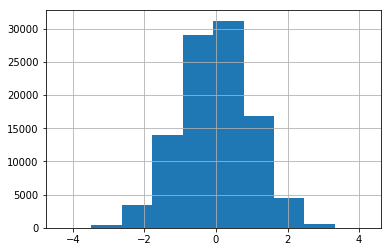

In [48]:
df[0].hist();

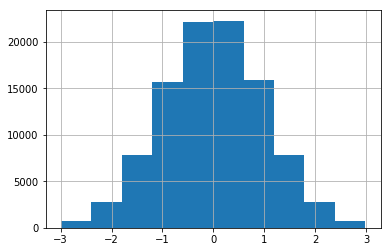

In [50]:
df_new[0].hist();

# Transforming the data

In [51]:
data = {'class': [1, 1, 1, 2, 2],
        'score': [10, 21, 35, 11, 26],
        'result': [0, 1, 0, 1, 0],
        'performance': ['strong', 'weak', 'normal', 'weak', 'strong']}
df = pd.DataFrame(data)

In [52]:
df.result.map({0:'fail', 1:'pass'})

0    fail
1    pass
2    fail
3    pass
4    fail
Name: result, dtype: object

In [53]:
df['pass or fail'] = df.result.map({0:'fail', 1:'pass'})
df

,class,score,result,performance,pass or fail
0,1,10,0,strong,fail
1,1,21,1,weak,pass
2,1,35,0,normal,fail
3,2,11,1,weak,pass
4,2,26,0,strong,fail


In [54]:
def stand(x):
    mean=df.score.mean()
    std=df.score.std()
    y = (x-mean)/std
    return y

In [55]:
df['score standard']=df.score.apply(stand)

In [56]:
df

,class,score,result,performance,pass or fail,score standard
0,1,10,0,strong,fail,-1.009295
1,1,21,1,weak,pass,0.038087
2,1,35,0,normal,fail,1.371118
3,2,11,1,weak,pass,-0.914078
4,2,26,0,strong,fail,0.514169


In [57]:
df_num =df.loc[:, ['class', 'result', 'score', 'score standard']]
df_num

,class,result,score,score standard
0,1,0,10,-1.009295
1,1,1,21,0.038087
2,1,0,35,1.371118
3,2,1,11,-0.914078
4,2,0,26,0.514169


In [59]:
df_num.apply(max)

class              2.000000
result             1.000000
score             35.000000
score standard     1.371118
dtype: float64

In [61]:
df_num.apply(max, axis=1)

0    10.0
1    21.0
2    35.0
3    11.0
4    26.0
dtype: float64

In [63]:
df_num.applymap(lambda x: len(str(x)))

,class,result,score,score standard
0,1,1,2,19
1,1,1,2,19
2,1,1,2,18
3,1,1,2,19
4,1,1,2,18


In [65]:
df_num.applymap(lambda x: '\$' + str(x))

,class,result,score,score standard
0,\$1,\$0,\$10,\$-1.0092949703936966
1,\$1,\$1,\$21,\$0.03808660265636577
2,\$1,\$0,\$35,\$1.3711176956291724
3,\$2,\$1,\$11,\$-0.9140784637527819
4,\$2,\$0,\$26,\$0.5141691358609396
